# Chapter 4 Calculations

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact#, interactive, fixed, interact_manual
from ipywidgets import Layout, Box

import pyradi.ryplot as ryplot
%matplotlib inline


In [2]:
def sigmoid(x,w,b):
    return 1 / (1 + np.exp(- x * w - b))

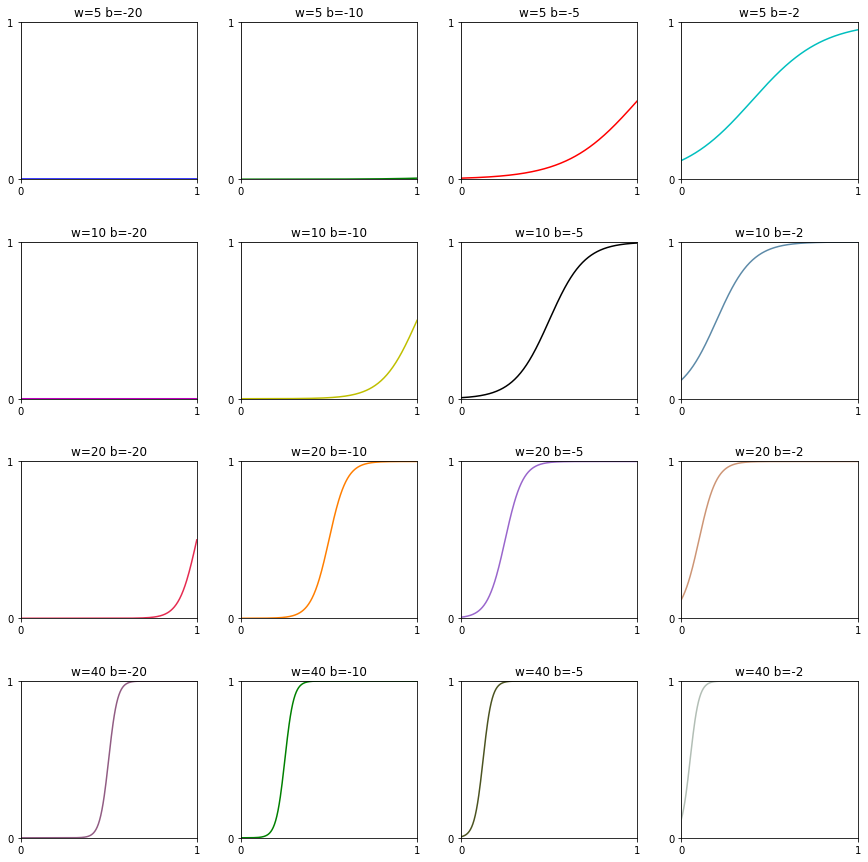

In [3]:
x = np.linspace(0,1,300)

p = ryplot.Plotter(1,4,4,figsize=(15,15),doWarning=False)
ws = [5,10,20,40]
bs = [-20,-10,-5,-2]
for iw,w in enumerate(ws):
    for ib,b in enumerate(bs):
        y = sigmoid(x,w,b )
        p.plot(1+ib+iw*len(bs), x, y, f'w={w} b={b}',maxNX=1,maxNY=1,xAxisFmt='%.0f',yAxisFmt='%.0f',pltaxis=[0,1,0,1] )
p.saveFig('sigmoid4x4plot.pdf')

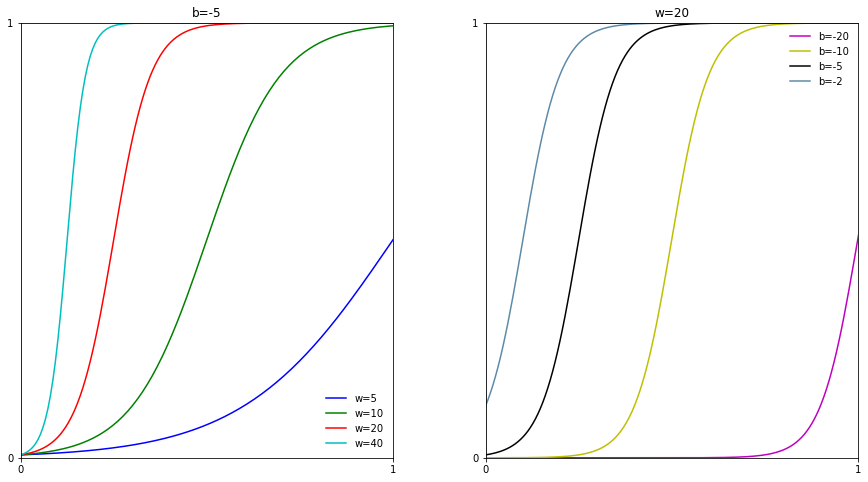

In [4]:
x = np.linspace(0,2,300)
p = ryplot.Plotter(1,1,2,figsize=(15,8),doWarning=False)

ws = [5,10,20,40]
bs = [-5]
for iw,w in enumerate(ws):
    for ib,b in enumerate(bs):
        y = sigmoid(x,w,b )
        p.plot(1, x, y, f'b={b}',maxNX=1,maxNY=1,xAxisFmt='%.0f',yAxisFmt='%.0f',pltaxis=[0,1,0,1], label=[f'w={w}'] )
        
ws = [20]
bs =  [-20,-10,-5,-2]
for iw,w in enumerate(ws):
    for ib,b in enumerate(bs):
        y = sigmoid(x,w,b )
        p.plot(2, x, y, f'w={w}',maxNX=1,maxNY=1,xAxisFmt='%.0f',yAxisFmt='%.0f',pltaxis=[0,1,0,1], label=[f'b={b}'] )
        
p.saveFig('sigmoid1x2plot.pdf')

## Interactive sigmoid 

Try clicking on the bias, $b$, and dragging to the right to increase it. You'll see that as the bias increases the graph moves to the left, but its shape doesn't change.

Next, click and drag to the left in order to decrease the bias. You'll see that as the bias decreases the graph moves to the right, but, again, its shape doesn't change.

Next, decrease the weight to around 2 or 3. You'll see that as you decrease the weight, the curve broadens out. You might need to change the bias as well, in order to keep the curve in-frame.

Finally, increase the weight up past $w=100$. As you do, the curve gets steeper, until eventually it begins to look like a step function. Try to adjust the bias so the step occurs near $x=0.3$.

In [5]:

def plot_sigmoid_bw(w=110, b=-36):
    x = np.linspace(0,2,300)
    y = sigmoid(x,w,b )

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.plot(x,  y,  linewidth=2)
    ax.set_title(f's={-b/w:.4f}')

# The interact function automatically builds a user interface for exploring sigmoid
interact(plot_sigmoid_bw, w=(1.0, 1000, 0.1), b=(-400, -1, .1));

interactive(children=(FloatSlider(value=110.0, description='w', max=1000.0, min=1.0), FloatSlider(value=-36.0,…

In [6]:
from ipywidgets import interact#, interactive, fixed, interact_manual

def plot_sigmoid_s(s=0.5):

    w = 300
    b = -s * w
    x = np.linspace(0,1,300)
    y = sigmoid(x,w,b )

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.plot(x,  y,  linewidth=2)
    ax.set_title(f's={-b/w:.4f}')

# The interact function automatically builds a user interface for exploring sigmoid
interact(plot_sigmoid_s, s=(0, 1, 0.1));

interactive(children=(FloatSlider(value=0.5, description='s', max=1.0), Output()), _dom_classes=('widget-inter…

The following plot shows the weighted sum of the activation inputs to the output neuron (before the sigmoid on the output neuron).

Play around with the following values

|s1 | s2 |w1 |w2|
|---|---|---|---|
| 0.85 |0.4  | 0.6 | 1.11 |
| 0.52 |0.24  | 0.15 | 0.92 |
| 0.52 |0.83  | 0.15 | 0.92 |
| 0.52 |0.83  | 0.9| -0.8 |
| 0.52 |0.83  | 0.9| -1.42 |



In [7]:
from ipywidgets import interact#, interactive, fixed, interact_manual

def plot_activation_2s2w(s1,s2,w1,w2):

    x = np.linspace(0,1,300)
    
    wh = 300
    b1 = -s1 * wh
    b2 = -s2 * wh
    a1 = sigmoid(x,wh,b1 )
    a2 = sigmoid(x,wh,b2 )

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.plot(x,  a1*w1+a2*w2,  linewidth=2)
    ax.set_title(f's={-b/w:.4f}')
    ax.set_ylim(-4,4)

# The interact function automatically builds a user interface for exploring sigmoid
interact(plot_activation_2s2w, s1=(-2, 2, 0.01), s2=(-2, 2, 0.01), w1=(-2, 2, 0.01), w2=(-2, 2, 0.01));

interactive(children=(FloatSlider(value=0.0, description='s1', max=2.0, min=-2.0, step=0.01), FloatSlider(valu…

## Weights into a single height variable

Start with the following values:

|s1 |s2 |h|
|---|---|---|
|-0.7|0.33|-12.8|


In [71]:
from ipywidgets import interact#, interactive, fixed, interact_manual

def plot_activation_2sh(s1,s2,h):

    x = np.linspace(-1,1,300)
    w1 = h
    w2 = -h
    wh = 300
    b1 = -s1 * wh
    b2 = -s2 * wh
    a1 = sigmoid(x,wh,b1 )
    a2 = sigmoid(x,wh,b2 )

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.plot(x,  a1*w1+a2*w2,  linewidth=2)
    ax.set_title(f's={-b/w:.4f}')
    ax.set_ylim(-4,4)
    ax.set_xlim(-1,1)

# The interact function automatically builds a user interface for exploring sigmoid
interact(plot_activation_2sh, s1=(-1, 1, 0.01), s2=(-1, 1, 0.01), h=(-2, 2, 0.01));

interactive(children=(FloatSlider(value=0.0, description='s1', max=1.0, min=-1.0, step=0.01), FloatSlider(valu…

## Multitple $s$ and $h$ values


Start with the following values:

|s1 |s2 |h12|s3|s4|h34|
|---|---|---|---|---|---|
|-0.79|-0.7|-0.79|0.56|0.92|0.92|



In [128]:
from ipywidgets import interact#, interactive, fixed, interact_manual

def plot_activation_4s2h(s1,s2,h12,s3,s4,h34):

    x = np.linspace(-10,1,300)
    wh = 300
    a1 = sigmoid(x,wh,-s1 * wh )
    a2 = sigmoid(x,wh,-s2 * wh )
    a3 = sigmoid(x,wh,-s3 * wh )
    a4 = sigmoid(x,wh,-s4 * wh )

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.plot(x,  a1*h12+a2*(-h12) +a3*h34+a4*(-h34),  linewidth=2)
    ax.set_ylim(-4,4)
    ax.set_xlim(-1,1)

# The interact function automatically builds a user interface for exploring sigmoid
interact(plot_activation_4s2h, s1=(-2, 2,0.01), s2=(-2, 2,0.01), h12=(-2, 2,0.01), 
         s3=(-2, 2, 0.01), s4=(-2, 2, 0.01), h34=(-2, 2, 0.01));

interactive(children=(FloatSlider(value=0.0, description='s1', max=2.0, min=-2.0, step=0.01), FloatSlider(valu…

## Arbitrary number of s values and h values

The following code can implement any number of s values and h values, specified in lists of tuples.

The sliders are defined in terms of the range of operation and a default value.  Sliders can be hidden or displayed.



In [171]:

def plot_activation_sh(**kwargs):
    """Plot the activation of a single output neuron from a set of hidden neurons,
    given a list of s values (hidden neuron bias/weight)
    and a list of h values (output neuron weight for each hidden neuron).
    
    The list has a 1.5 x number of hidden neurons tuples.
    Each tuple defines one slider, in terms of its name, default value and lo/hi limits.
    
    Each pair of two hidden neurons (with different s-values) share one h-weight value.
    The two s-values define the lower and upper s-values, defining an interval on the x axis.
    The output of the two s-value neurons are subtracted and multiplied with the h-weight value.
    This set of three values (2xs and 1xh) defines one 'pulse' along the x-axis with height h.
    
    The network parameters are given as **kwargs, on the following understanding:
    1) tuples with s values (one tuple for each hidden neuron input weight, s=bias/weight)
    2) tuples with h values (one tuple shared between each pair of two hidden neurons)
    """
    numNeuronPairs = int(len(kwargs)/3)
    x = np.linspace(-1,1,300)
    wh = 300
    sum = 0
    for i in range(numNeuronPairs):
        lonum = f'{i*2+0:02d}'
        hinum = f'{i*2+1:02d}'
        sum += kwargs[f'h{lonum}-{hinum}'] * sigmoid(x,wh,-kwargs[f's{lonum}']*wh) - \
            kwargs[f'h{lonum}-{hinum}'] * sigmoid(x,wh,-kwargs[f's{hinum}']*wh) 
    svals = [kwargs[f's{s:02d}'] for s in range(2*numNeuronPairs)]
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.plot(x, sum,  linewidth=2)
    ax.set_ylim(np.min(sum),np.max(sum))
    ax.set_xlim(min(svals),max(svals))

    
def setupShow_sh(ss,hs,hidden=False,step=0.01):
    """Load tuples and set up the sliders.
    
    ss: list of s-value tuples
    hs: list of h-value tuples
    hidden: if True don't display sliders
    step: slider step values
    
    """
    sliders = []
    for i,(lo,hi,val) in enumerate(ss):
        slid = widgets.FloatSlider(value=val,min=lo,max=hi,step=step,
                            description=f's{i:02d}',disabled=False,continuous_update=False,
                            orientation='horizontal',readout=True,readout_format='.2f')
        if hidden==True:
            slid.layout.display = 'none'
        sliders.append(slid)

    for i,(lo,hi,val) in enumerate(hs):
        slid = widgets.FloatSlider(value=val,min=lo,max=hi,step=step,
                            description=f'h{2*i:02d}-{2*i+1:02d}',disabled=False,
                            continuous_update=False,orientation='horizontal',
                            readout=True,readout_format='.2f')
        if hidden==True:
            slid.layout.display = 'none'
        sliders.append(slid)

    kwargs = {slider.description:slider for i,slider in enumerate(sliders)}
    interact(plot_activation_sh,**kwargs);

    
# ss is a list of slider s-values (min, max, value)
# hs is a list of slider h-values (min, max, value)
case = 1
if case==0:
    ss = [(-1, 1,-0.9),(-1, 1,-0.71), (-1, 1,0.01), (-1, 1,0.36)]
    hs = [(-2, 2, 0.69),(-2, 2, -1.52)]
    hidden = False
elif case==1:
    ss = [(-1, 1,0),(-1, 1,0.2), (-1, 1,0.2), (-1, 1,0.4), (-1, 1,0.4), (-1, 1,0.6), 
          (-1, 1,0.6), (-1, 1,0.8), (-1, 1,0.8), (-1, 1,1)]
    hs = [(-2, 2, 0.3),(-2, 2, -1.0),(-2, 2, 0.2),(-2, 2, -1.2),(-2, 2, -0.3)]
    hidden = False

setupShow_sh(ss,hs,hidden=hidden)

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='s00', max=1.0, min=-1.0, st…